# Plotting tools - Xray Vision - XSVS Analysis

In [1]:
import skxray.speckle_analysis as spe_vis
import skxray.roi as roi
import skxray.correlation as corr
import skxray.core as core

import xray_vision.xsvs_plotting as xsvs_plot

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm

#  Duke Silica Data from -
       L. Li, P. Kwasniewski, D. Oris, L Wiegart, L. Cristofolini,
       C. Carona and A. Fluerasu , "Photon statistics and speckle visibility
       spectroscopy with partially coherent x-rays" J. Synchrotron Rad.,
       vol 21, p 1288-1295, 2014.

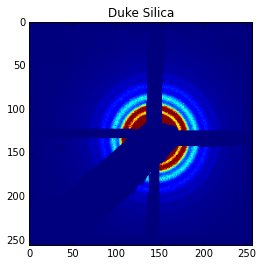

In [15]:
data_dir = "/Volumes/Data/BeamLines/CHX/Luxi_description_files_for_duke/"
duke_ndata = np.load(data_dir+"duke_img_1_5000.npy")
duke_dark = np.load(data_dir+"duke_dark.npy")

duke_data = []
for i in range(duke_ndata.shape[0]):
    duke_data.append(duke_ndata[i] - duke_dark)
    
duke_data = np.asarray(duke_data)    

avg_img = np.average(duke_data, axis=0)

mask4 = np.load(data_dir+"new_mask4.npy")

mask = np.load(data_dir+"Luxi_duke_mask.npy")

N_mask = ~(mask + mask4)

plt.imshow(N_mask*avg_img, vmax=1e0)
plt.title("Duke Silica")
plt.show()

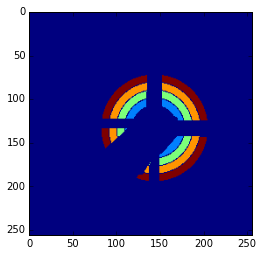

In [16]:
mask_data1 = N_mask*duke_data[0:2000]
mask_data2 = N_mask*duke_data[2001: 3500]
mask_data3 = N_mask*duke_data[3501:5000]


inner_radius = 26
width = 8
spacing = 1
num_rings = 4

edges = roi.ring_edges(inner_radius, width, spacing, num_rings)

rings = roi.rings(edges, (133, 143), avg_img.shape)

rings_mask = rings*N_mask

plt.imshow(rings_mask)
plt.show()

# Mean intensities for ROIS' of the labeled array for set of images

In [17]:
image_sets = (mask_data1, mask_data2, mask_data3)

mean_int_sets, index_list = spe_vis.mean_intensity_sets(image_sets, rings_mask)

combine_intensity = spe_vis.combine_mean_intensity(mean_int_sets, index_list)


# use mean_int_sets.pop(0) to remove the first element in the list last element pop(-1)

# Combine Intensities

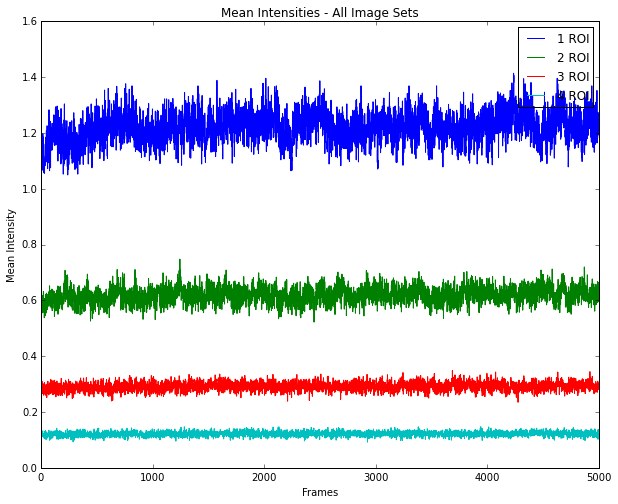

In [18]:
fig, axes = plt.subplots(figsize=(10,8))
xsvs_plot.combine_intensity_plotter(axes, combine_intensity)
plt.show()


# Plot mean intensities for ROIS' of the labeled array for different image sets.

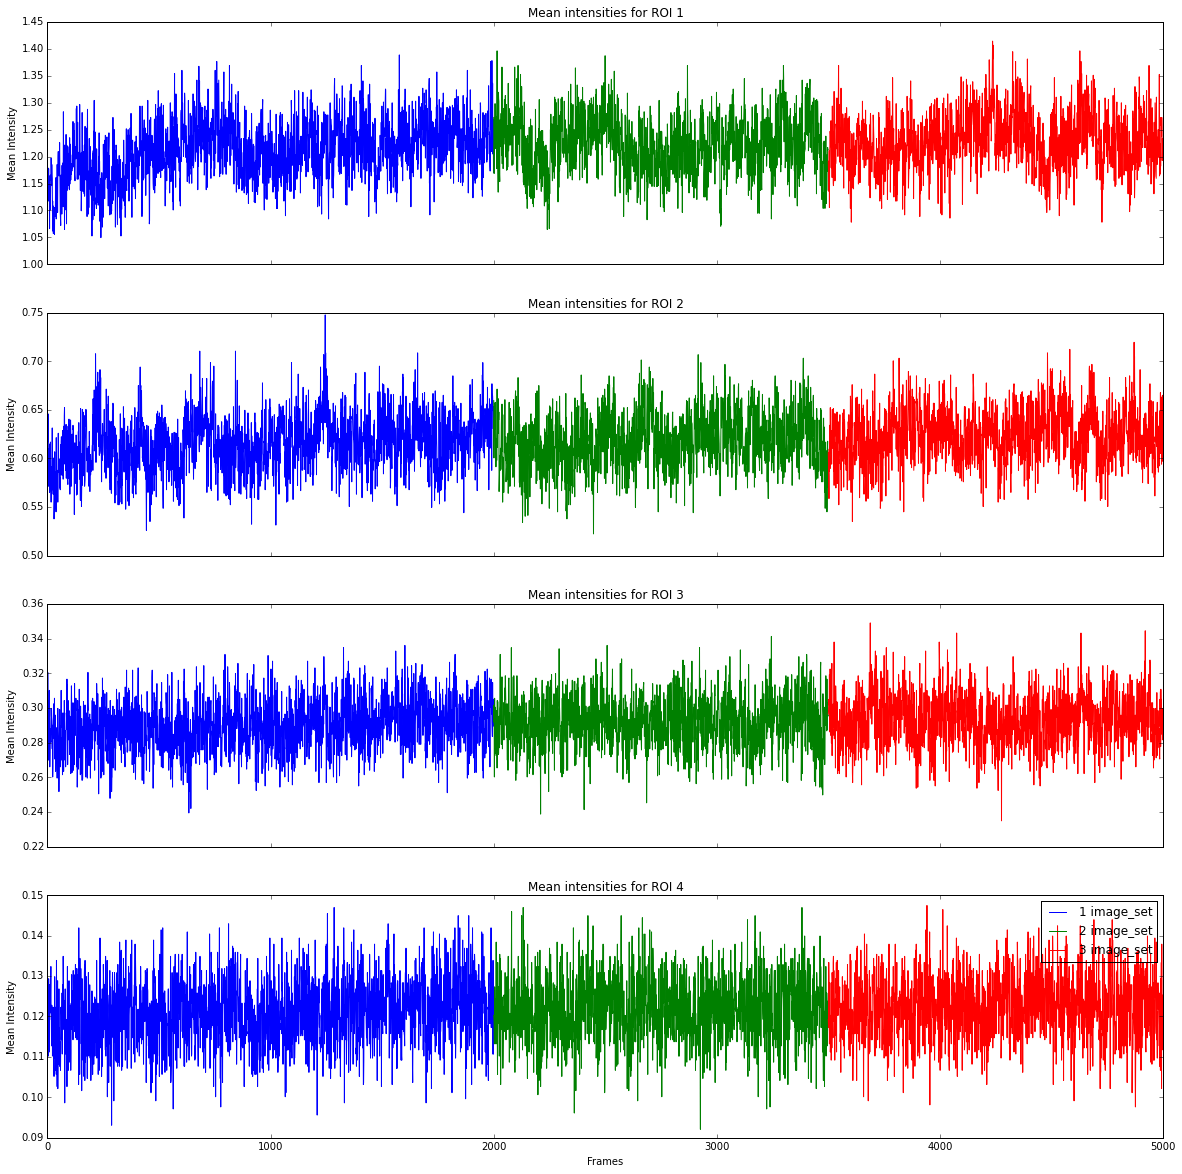

In [22]:
fig, ax = plt.subplots(index_list[0].shape[0], figsize=(20, 20), sharex=True)
xsvs_plot.mean_intensity_plotter(ax, mean_int_sets, index_list)
plt.show()

# Circular average(radial integration) of the intensity distribution of the image data.


In [23]:
sum_img = np.sum(duke_data, axis=0)
est_center = (133, 143)   


bin_cen, ring_avg = spe_vis.circular_average(sum_img*N_mask, est_center, threshold=0, nx=100,
                                         pixel_size=(0.1, 0.1))



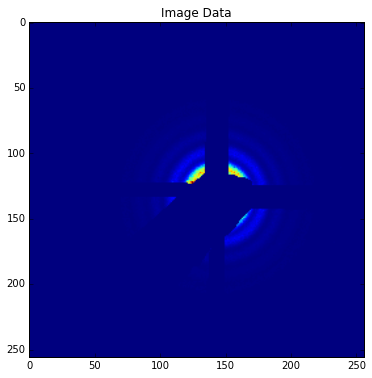

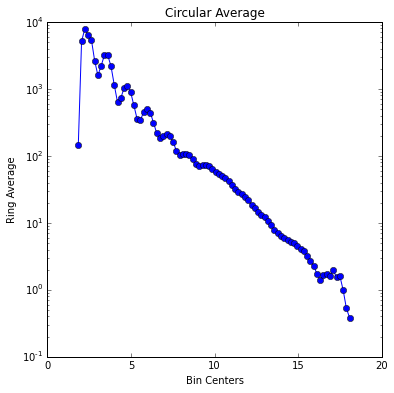

In [24]:
fig, ax1 = plt.subplots(figsize=(6,6))
fig, ax2 = plt.subplots(figsize=(6, 6))
xsvs_plot.circular_average_plotter(ax1, ax2, sum_img*N_mask, ring_avg, bin_cen,cmap='jet')

# Data for graphical representation of pixels variation over time for required ROI.

In [25]:
roi_kigmograph = spe_vis.roi_kymograph(mask_data1[200:1000], rings_mask, num=1)

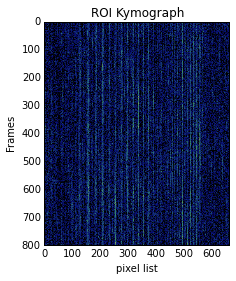

In [26]:
fig, ax = plt.subplots()
xsvs_plot.roi_kymograph_plotter(ax, roi_kigmograph)
plt.show()

# This will provide intensities of the ROI's of the labeled array according to the pixel list

In [27]:
roi_pixel_values, index = spe_vis.roi_pixel_values(avg_img*N_mask, rings_mask, index=None)

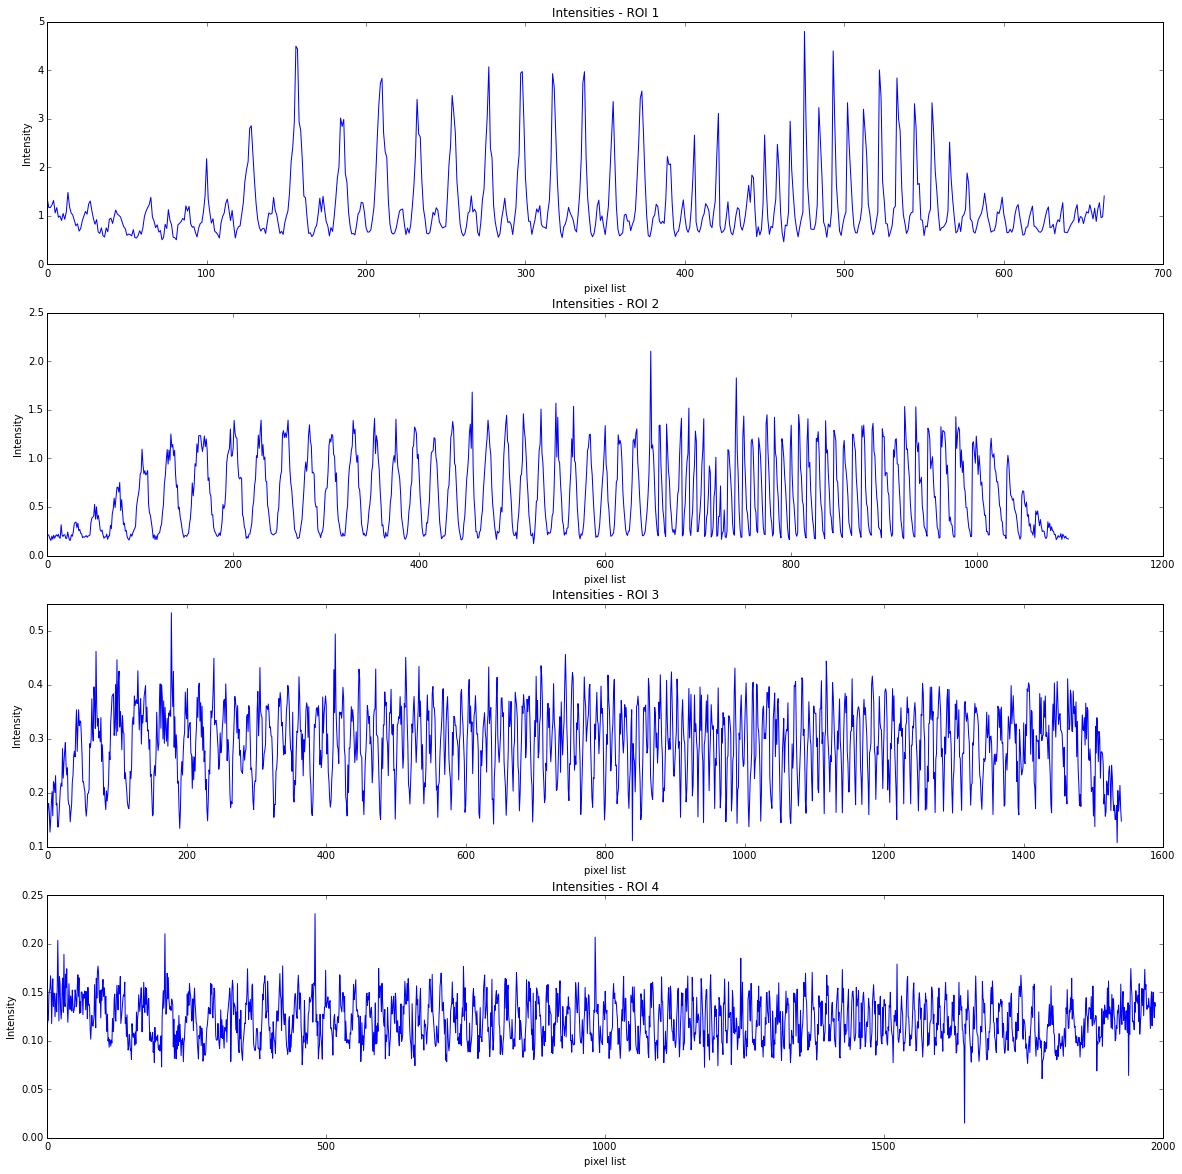

In [12]:
fig, ax = plt.subplots(len(roi_pixel_values.values()), figsize=(20, 20))
xsvs_plot.roi_pixel_plotter(ax, roi_pixel_values)
plt.show()